# Ventas Centro Comercial

La base de datos Centro Comercial es un caso clásico de registro de facturas de compra por parte de los puntos de atención. Allí se solicitan los datos de los clientes compradores a partir de facturas superiores a 50 mil pesos. El objetivo es poder caracterizar los clientes e identificar los establecimientos de mayor y menor desempeño en función de la afluencia de clientes que visitan sus tiendas. Se espera mediante un análisis descriptivo y exploratorio proponer una segmentación de almacenes y clientes y proponer estrategias de fidelización.

### Importar librerías

In [103]:
import pandas as pd
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

### Leer los datos

In [5]:
df = pd.read_excel('Caso 04 - Ventas en Centro Comercial.xlsx', sheet_name='bd')

In [6]:
df.head(3)

,Cedula,Nombre Completo,nCodigoTransaccion,nCodigoConsumidor,Almacen,Categoria,nVenta,nItem,sEmail,Ciudad,...,EDAD,RECENCIA DIAS,Dirección,MailValido,CelValid,TelefonoMovil,TelOfcValid,TelefonoOficina,TelCasaValid,TelefonoCasa
0,1,NOMBRE APELLIDO 1,29344936,6700170,Escape,Moda Masculina y Femenina,203000,1,NaN,SABANETA,...,19,15,NaN,No,Si,NaN,No,NaN,Si,NaN
1,2,NOMBRE APELLIDO 2,31924314,2357373,Bon Bonite,Calzado y Bolsos,284000,1,NaN,MEDELLIN,...,40,3,NaN,No,Si,NaN,No,NaN,Si,NaN
2,3,NOMBRE APELLIDO 3,31924315,2357373,Velez,Calzado y Bolsos,324000,1,NaN,MEDELLIN,...,40,3,NaN,No,Si,NaN,No,NaN,Si,NaN


In [7]:
df.tail(3)

,Cedula,Nombre Completo,nCodigoTransaccion,nCodigoConsumidor,Almacen,Categoria,nVenta,nItem,sEmail,Ciudad,...,EDAD,RECENCIA DIAS,Dirección,MailValido,CelValid,TelefonoMovil,TelOfcValid,TelefonoOficina,TelCasaValid,TelefonoCasa
112949,112950,NOMBRE APELLIDO 112950,26746717,6355246,Saldos De Exportación,Moda Masculina y Femenina,5000,1,NaN,MEDELLIN,...,13,23,NaN,No,Si,NaN,Si,NaN,Si,NaN
112950,112951,NOMBRE APELLIDO 112951,31386254,6355246,Calzado Goysa,Calzado y Bolsos,60000,1,NaN,MEDELLIN,...,13,9,NaN,No,Si,NaN,Si,NaN,Si,NaN
112951,112952,NOMBRE APELLIDO 112952,31577681,7060684,Monas Y Morenas,Moda Femenina,50000,1,NaN,MEDELLIN,...,22,7,NaN,Si,Si,NaN,No,NaN,Si,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112952 entries, 0 to 112951
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cedula              112952 non-null  int64  
 1   Nombre Completo     112952 non-null  object 
 2   nCodigoTransaccion  112952 non-null  int64  
 3   nCodigoConsumidor   112952 non-null  int64  
 4   Almacen             112952 non-null  object 
 5   Categoria           112952 non-null  object 
 6   nVenta              112952 non-null  int64  
 7   nItem               112952 non-null  int64  
 8   sEmail              0 non-null       float64
 9   Ciudad              112952 non-null  object 
 10  nCodigoGenero       112952 non-null  object 
 11  nCodigoEstadoCivil  112952 non-null  object 
 12  ANO                 112952 non-null  int64  
 13  MES                 112952 non-null  object 
 14  MES 2               112952 non-null  int64  
 15  DIA                 112952 non-nul

In [10]:
df['nCodigoConsumidor'] = df['nCodigoConsumidor'].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112952 entries, 0 to 112951
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cedula              112952 non-null  int64  
 1   Nombre Completo     112952 non-null  object 
 2   nCodigoTransaccion  112952 non-null  int64  
 3   nCodigoConsumidor   112952 non-null  object 
 4   Almacen             112952 non-null  object 
 5   Categoria           112952 non-null  object 
 6   nVenta              112952 non-null  int64  
 7   nItem               112952 non-null  int64  
 8   sEmail              0 non-null       float64
 9   Ciudad              112952 non-null  object 
 10  nCodigoGenero       112952 non-null  object 
 11  nCodigoEstadoCivil  112952 non-null  object 
 12  ANO                 112952 non-null  int64  
 13  MES                 112952 non-null  object 
 14  MES 2               112952 non-null  int64  
 15  DIA                 112952 non-nul

### Realizar el histograma del valor de la factura 'nVenta'

array([[<AxesSubplot:title={'center':'nVenta'}>]], dtype=object)

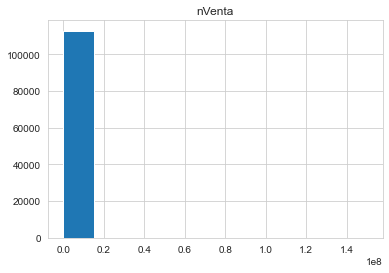

In [12]:
df.hist(column='nVenta')

In [9]:
mask = df['nVenta'] < 1000000
df_2 = df[mask]

<AxesSubplot:>

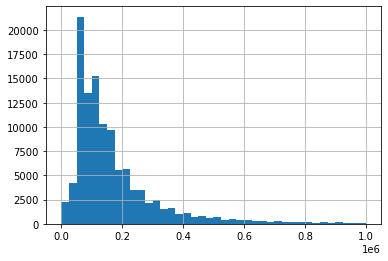

In [10]:
df_2['nVenta'].hist(bins=40)

array([[<AxesSubplot:title={'center':'nVenta'}>]], dtype=object)

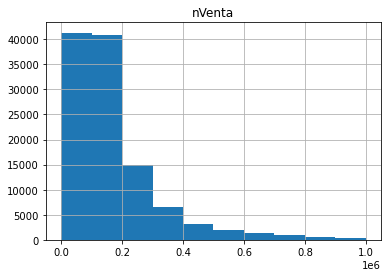

In [28]:
df_2.hist(column='nVenta')

### Comportamiento registro de facturas en el tiempo

Crear una columna con la fecha y verificar que sea tipo 'datetime'

In [14]:
df['fecha'] = pd.to_datetime(df['FECHA UNI'])

Realizar un grafico donde se muestre el comportamiento del valor de las facturas registradas a través del año 2010

In [57]:
facturas_mes_2010 = df[df['fecha'].dt.year == 2010].groupby('MES 2').sum()['nVenta'].reset_index()
facturas_mes_2010

,MES 2,nVenta
0,1,479985505
1,2,427942065
2,3,422973800
3,4,327668650
4,5,353490400
5,6,410650400
6,7,406820707
7,8,596239609
8,9,551910963
9,10,443889630


Text(0.5, 1.0, 'Title')

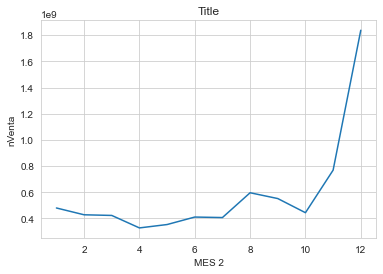

In [58]:
ax = sns.lineplot(data=facturas_mes_2010, x="MES 2", y="nVenta")
ax.set_title('Title')

Gráfico que compare el comportamiento de cada año mes a mes

In [83]:
df['month'] = df['fecha'].dt.month_name() # crear una columna que contenga el mes el texto

In [95]:
resumen_ventas = df.groupby(['ANO','MES','MES 2']).sum()['nVenta'].reset_index()

In [96]:
resumen_ventas

,ANO,MES,MES 2,nVenta
0,2008,Abril,4,189627617
1,2008,Agosto,8,341835340
2,2008,Diciembre,12,1803717628
3,2008,Julio,7,383187647
4,2008,Junio,6,343319913
5,2008,Mayo,5,414348276
6,2008,Noviembre,11,706539375
7,2008,Octubre,10,513326068
8,2008,Septiembre,9,371481046
9,2009,Abril,4,341834717


Ordenar los valores por año y mes

In [108]:
resumen_ventas.sort_values('MES 2', inplace=True)

<Figure size 1080x576 with 0 Axes>

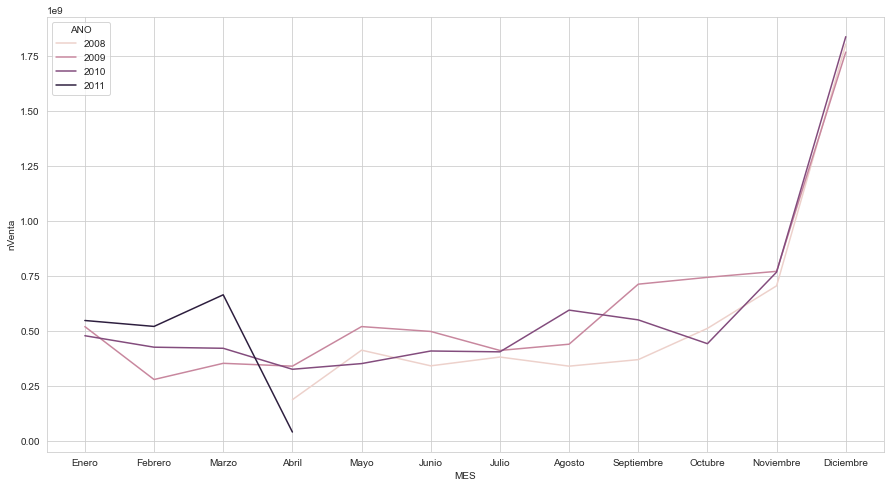

In [109]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=resumen_ventas, x="MES", y="nVenta", hue="ANO")

### Participación de ciudades

Mostrar en un grafico la participación de las 10 ciudades donde se registran más facturas 

1. Obtener las 10 ciudades donde más se registran facturas con su respectiva cantidad de facturas registradas

2. Realizar un gráfico comparativo entre las diferentes ciudades

### Mostrar en un gráfico la realción entre edad y valor de la factura

1. Realizar un scatter plot donde se muestre esta relación